In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
emp_surv = pd.read_csv("employee_survey_data.csv")
gen_data = pd.read_csv("general_data.csv")
man_surv = pd.read_csv("manager_survey_data.csv")
in_time = pd.read_csv("in_time.csv")
out_time = pd.read_csv("out_time.csv")

In [4]:
pd.set_option('display.max_columns', 500)
emp_surv.head()
gen_data.head()
in_time.head()
man_surv.head()
out_time.head()

In [5]:
#Check for NA and duplicates
emp_surv.isna().sum() #Present
gen_data.isna().sum() #Present
in_time.isna().sum() #Present but Nan on all rows of the same column should be considered
out_time.isna().sum() #Present but Nan on all rows of the same column should be considered
man_surv.isna().sum() #none

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [6]:
#Compare if holidays or same no of NAs are present in the dataframes in time and out time
sum(out_time.isna().sum().values!=in_time.isna().sum().values) #0
#Same columns in both in_time and out_time has all NA values

0

In [7]:
#Drop NaNs
emp_surv.dropna(inplace=True)
gen_data.dropna(inplace=True)

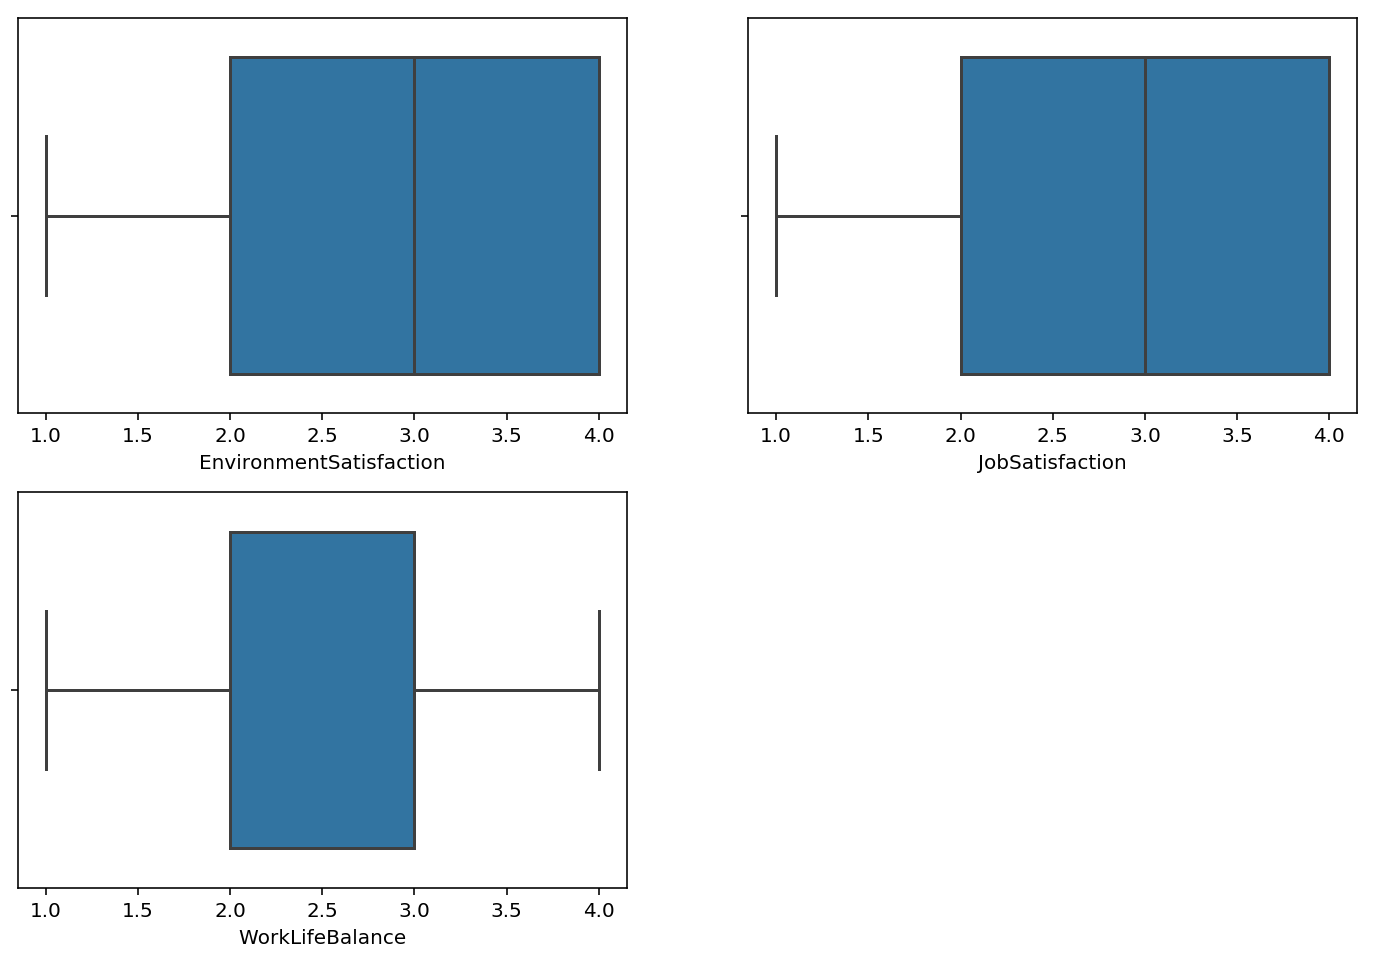

In [8]:
#Boxplots to check for outliers : Employee Survey
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.boxplot(emp_surv.EnvironmentSatisfaction)
plt.subplot(2,2,2)
sns.boxplot(emp_surv.JobSatisfaction)
plt.subplot(2,2,3)
sns.boxplot(emp_surv.WorkLifeBalance)
#no outliers

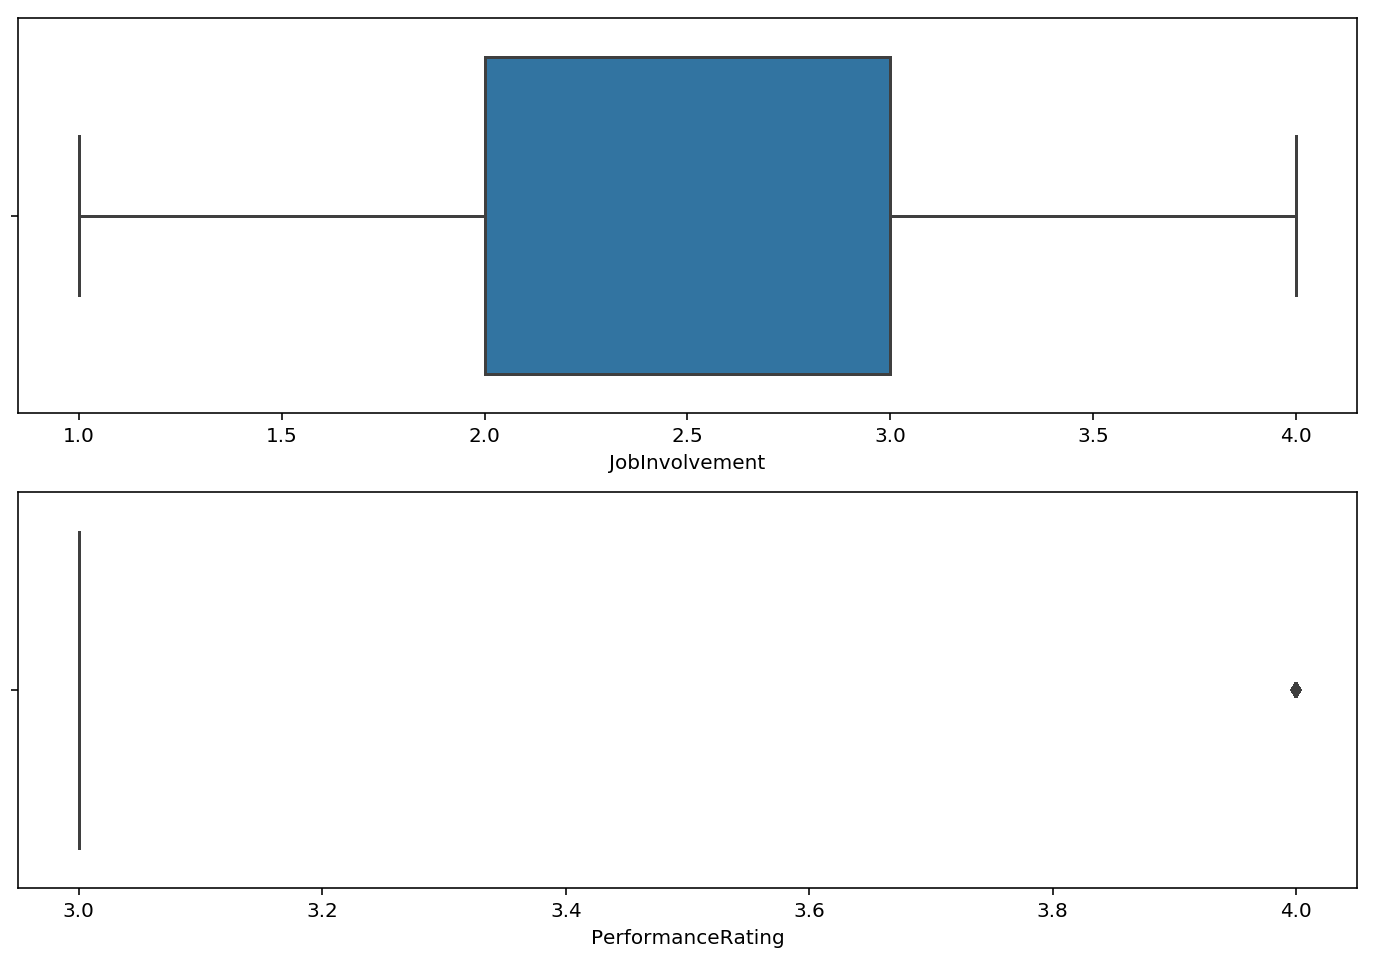

In [9]:
#Boxplots to check for outliers : Manager Survey
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.boxplot(man_surv.JobInvolvement)
plt.subplot(2,1,2)
sns.boxplot(man_surv.PerformanceRating) #Looks weird : Check

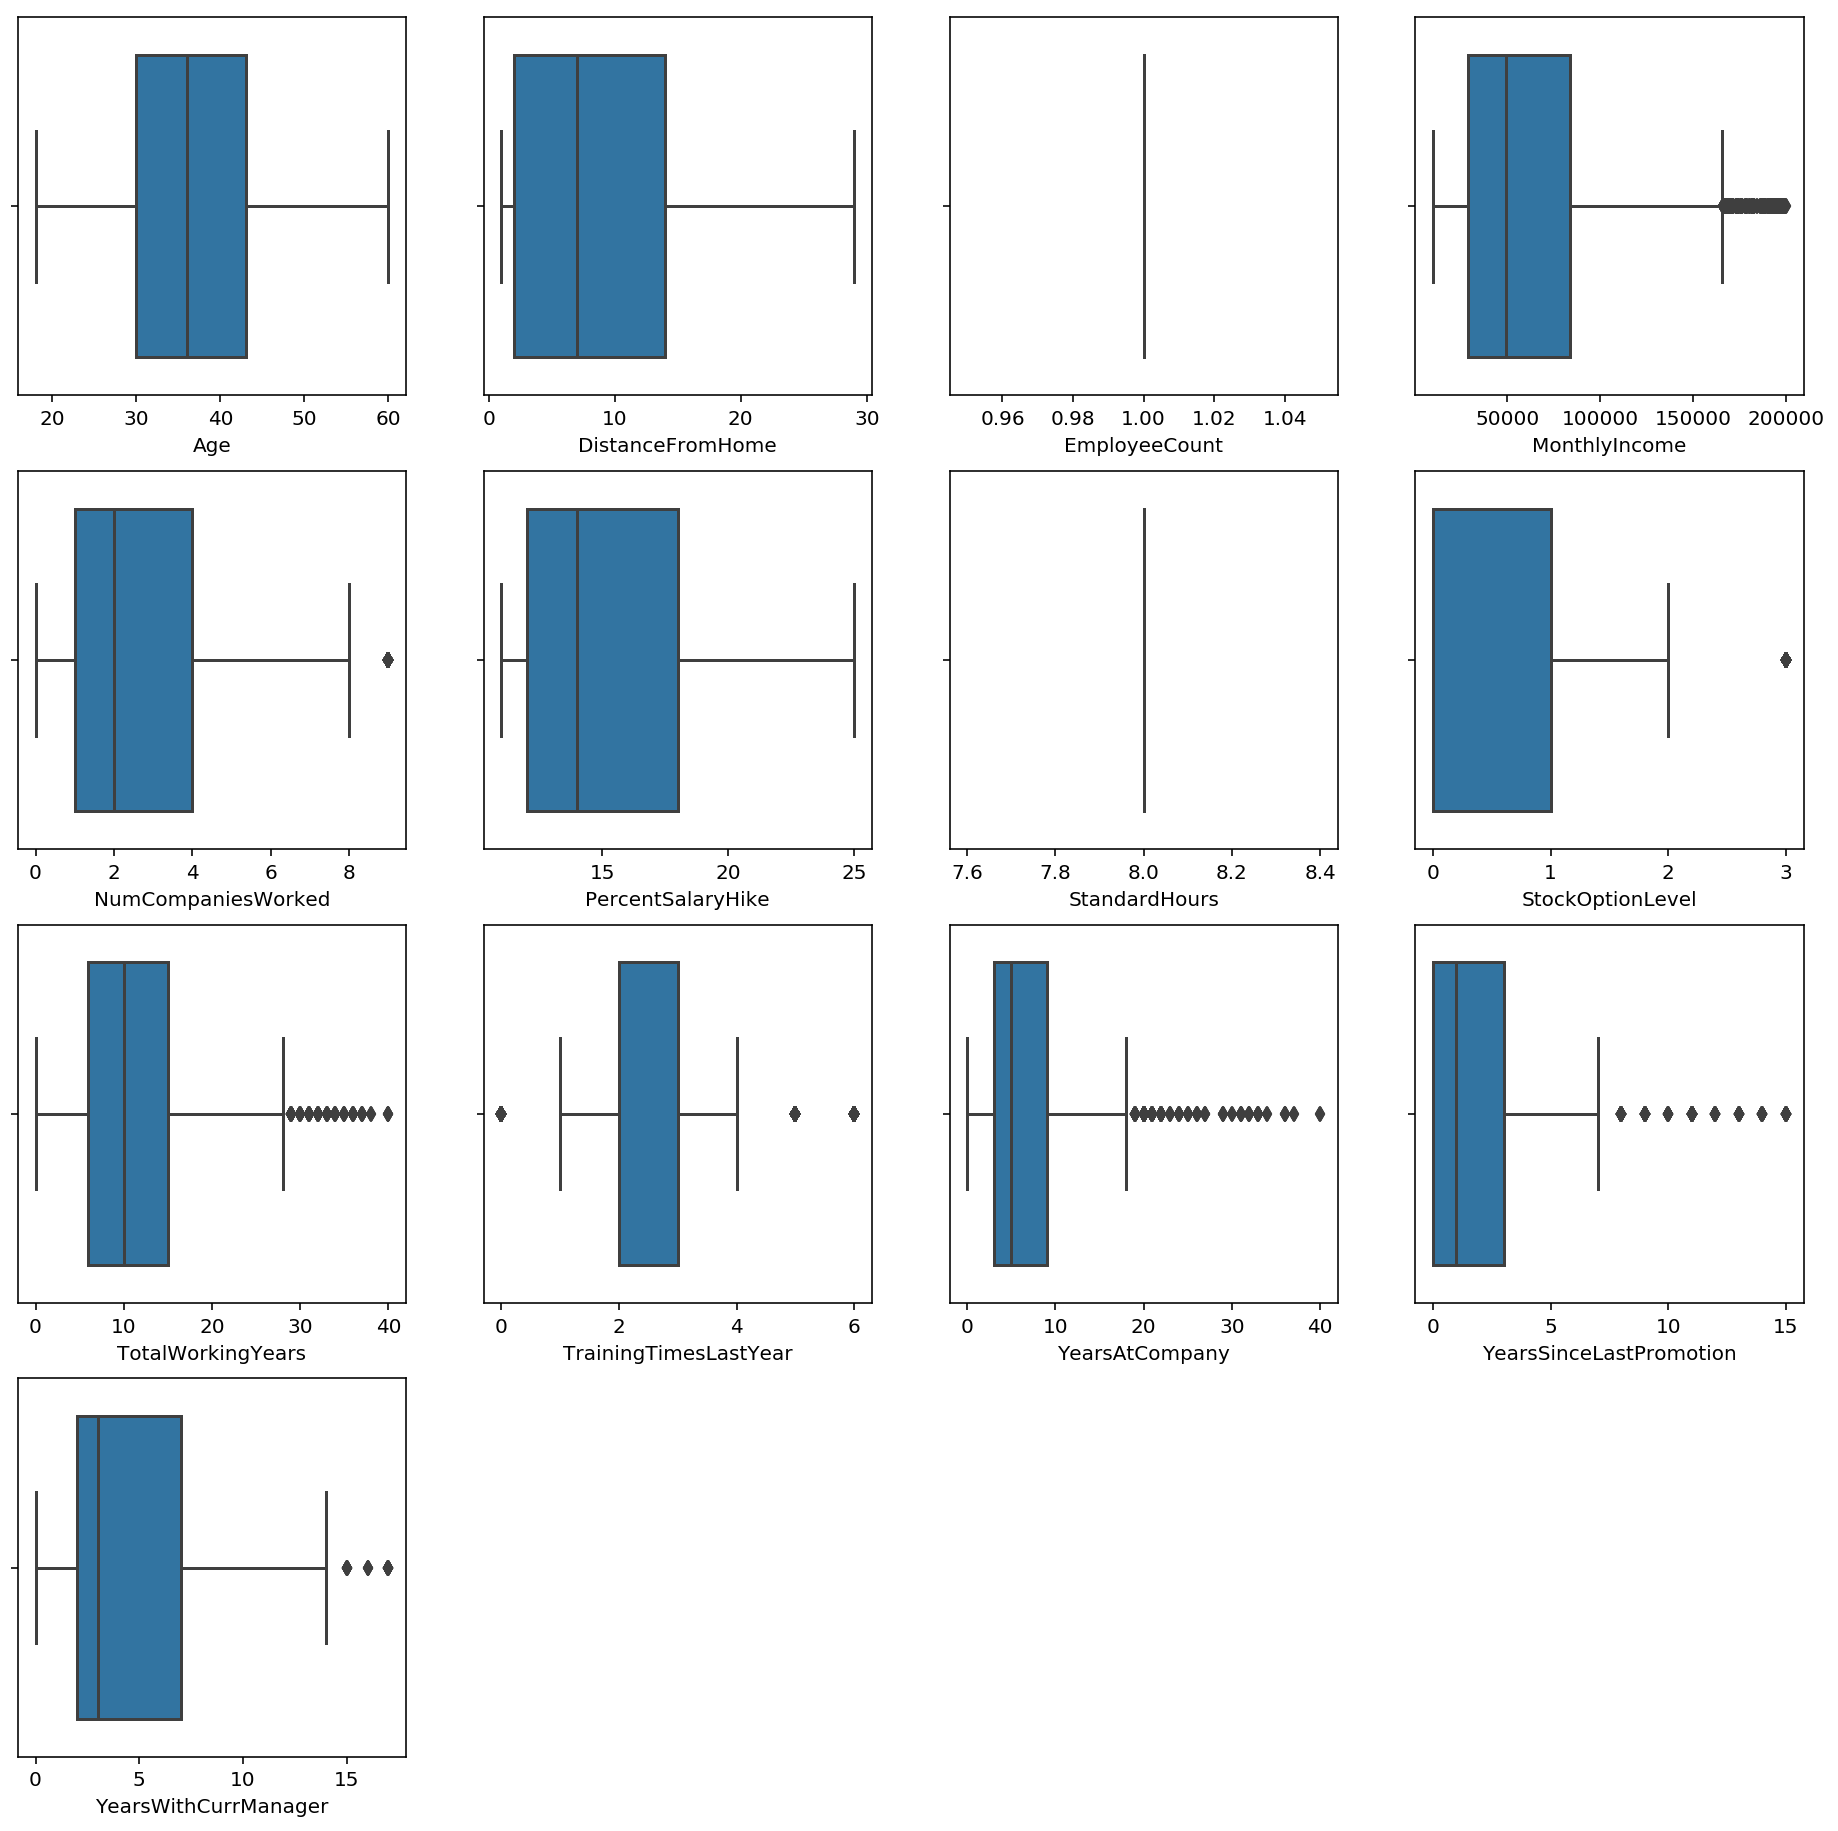

In [10]:
#Boxplots to check for outliers : Gen Data
plt.figure(figsize=(16,16))
plt.subplot(4,4,1)
sns.boxplot(gen_data.Age)
plt.subplot(4,4,2)
sns.boxplot(gen_data.DistanceFromHome)
plt.subplot(4,4,3)
sns.boxplot(gen_data.EmployeeCount) #Need to check : Looks only one unique value
plt.subplot(4,4,4)
sns.boxplot(gen_data.MonthlyIncome) #outliers
plt.subplot(4,4,5)
sns.boxplot(gen_data.NumCompaniesWorked) #outliers
plt.subplot(4,4,6)
sns.boxplot(gen_data.PercentSalaryHike)
plt.subplot(4,4,7)
sns.boxplot(gen_data.StandardHours) #Need to check : Looks only one unique value
plt.subplot(4,4,8)
sns.boxplot(gen_data.StockOptionLevel) #outliers
plt.subplot(4,4,9)
sns.boxplot(gen_data.TotalWorkingYears) #outliers
plt.subplot(4,4,10)
sns.boxplot(gen_data.TrainingTimesLastYear) #outliers
plt.subplot(4,4,11)
sns.boxplot(gen_data.YearsAtCompany) #outliers
plt.subplot(4,4,12)
sns.boxplot(gen_data.YearsSinceLastPromotion) #outliers
plt.subplot(4,4,13)
sns.boxplot(gen_data.YearsWithCurrManager) #outliers

In [11]:
#Gen data unique check
pd.unique(gen_data.EmployeeCount) #Remove this column only one unique value
pd.unique(gen_data.StandardHours) #Remove this column only one unique value
gen_data.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

In [12]:
#Manager survey unique check
pd.unique(man_surv.PerformanceRating) #Need to check for outliers separately

array([3, 4])

In [13]:
#Outlier check : gen_data
gen_data[['MonthlyIncome','NumCompaniesWorked','StockOptionLevel'
         ,'TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany'
         ,'YearsSinceLastPromotion','YearsWithCurrManager']].describe(percentiles=[.25,.50,.75,.90,.95,.99])
#MonthlyIncome Need outlier fixing - picking 180000
#NumCompaniesWorked No Need outlier fixing
#StockOptionLevel No Need outlier fixing
#TotalWorkingYears Need outlier fixing - picking 26
#TrainingTimesLastYear No Need outlier fixing
#YearsAtCompany Need outlier fixing - picking 24
#YearsSinceLastPromotion Need outlier fixing - picking 11
#YearsWithCurrManager Need outlier fixing - picking 11
#PerformanceRating No Need outlier fixing

,MonthlyIncome,NumCompaniesWorked,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000,4382.000000
mean,65061.702419,2.693291,0.794614,11.290278,2.798266,7.010497,2.191693,4.126198
std,47142.310175,2.497832,0.852397,7.785717,1.289402,6.129351,3.224994,3.569674
min,10090.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29110.000000,1.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,49190.000000,2.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,83790.000000,4.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
90%,138260.000000,7.000000,2.000000,23.000000,5.000000,15.000000,7.000000,9.000000
95%,178560.000000,8.000000,3.000000,28.000000,5.000000,20.000000,9.000000,10.000000
99%,196270.000000,9.000000,3.000000,35.000000,6.000000,31.000000,14.000000,14.000000


In [14]:
#Outliers Fix
gen_data.loc[gen_data.MonthlyIncome>180000,'MonthlyIncome'] = 180000
gen_data.loc[gen_data.TotalWorkingYears>26,'TotalWorkingYears'] = 26
gen_data.loc[gen_data.YearsAtCompany>24,'YearsAtCompany'] = 24
gen_data.loc[gen_data.YearsSinceLastPromotion>11,'YearsSinceLastPromotion'] = 11
gen_data.loc[gen_data.YearsWithCurrManager>11,'YearsWithCurrManager'] = 11

In [15]:
#Attrition Rate : 16%
gen_data[gen_data.Attrition=='Yes'].count().max()*100/gen_data.count().max()

16.08854404381561

In [16]:
#Merge the datasets
merge1 = pd.merge(gen_data,emp_surv,how='inner',on='EmployeeID')
df = pd.merge(merge1,man_surv,how='inner',on='EmployeeID')
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,180000,1.0,Y,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,Y,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


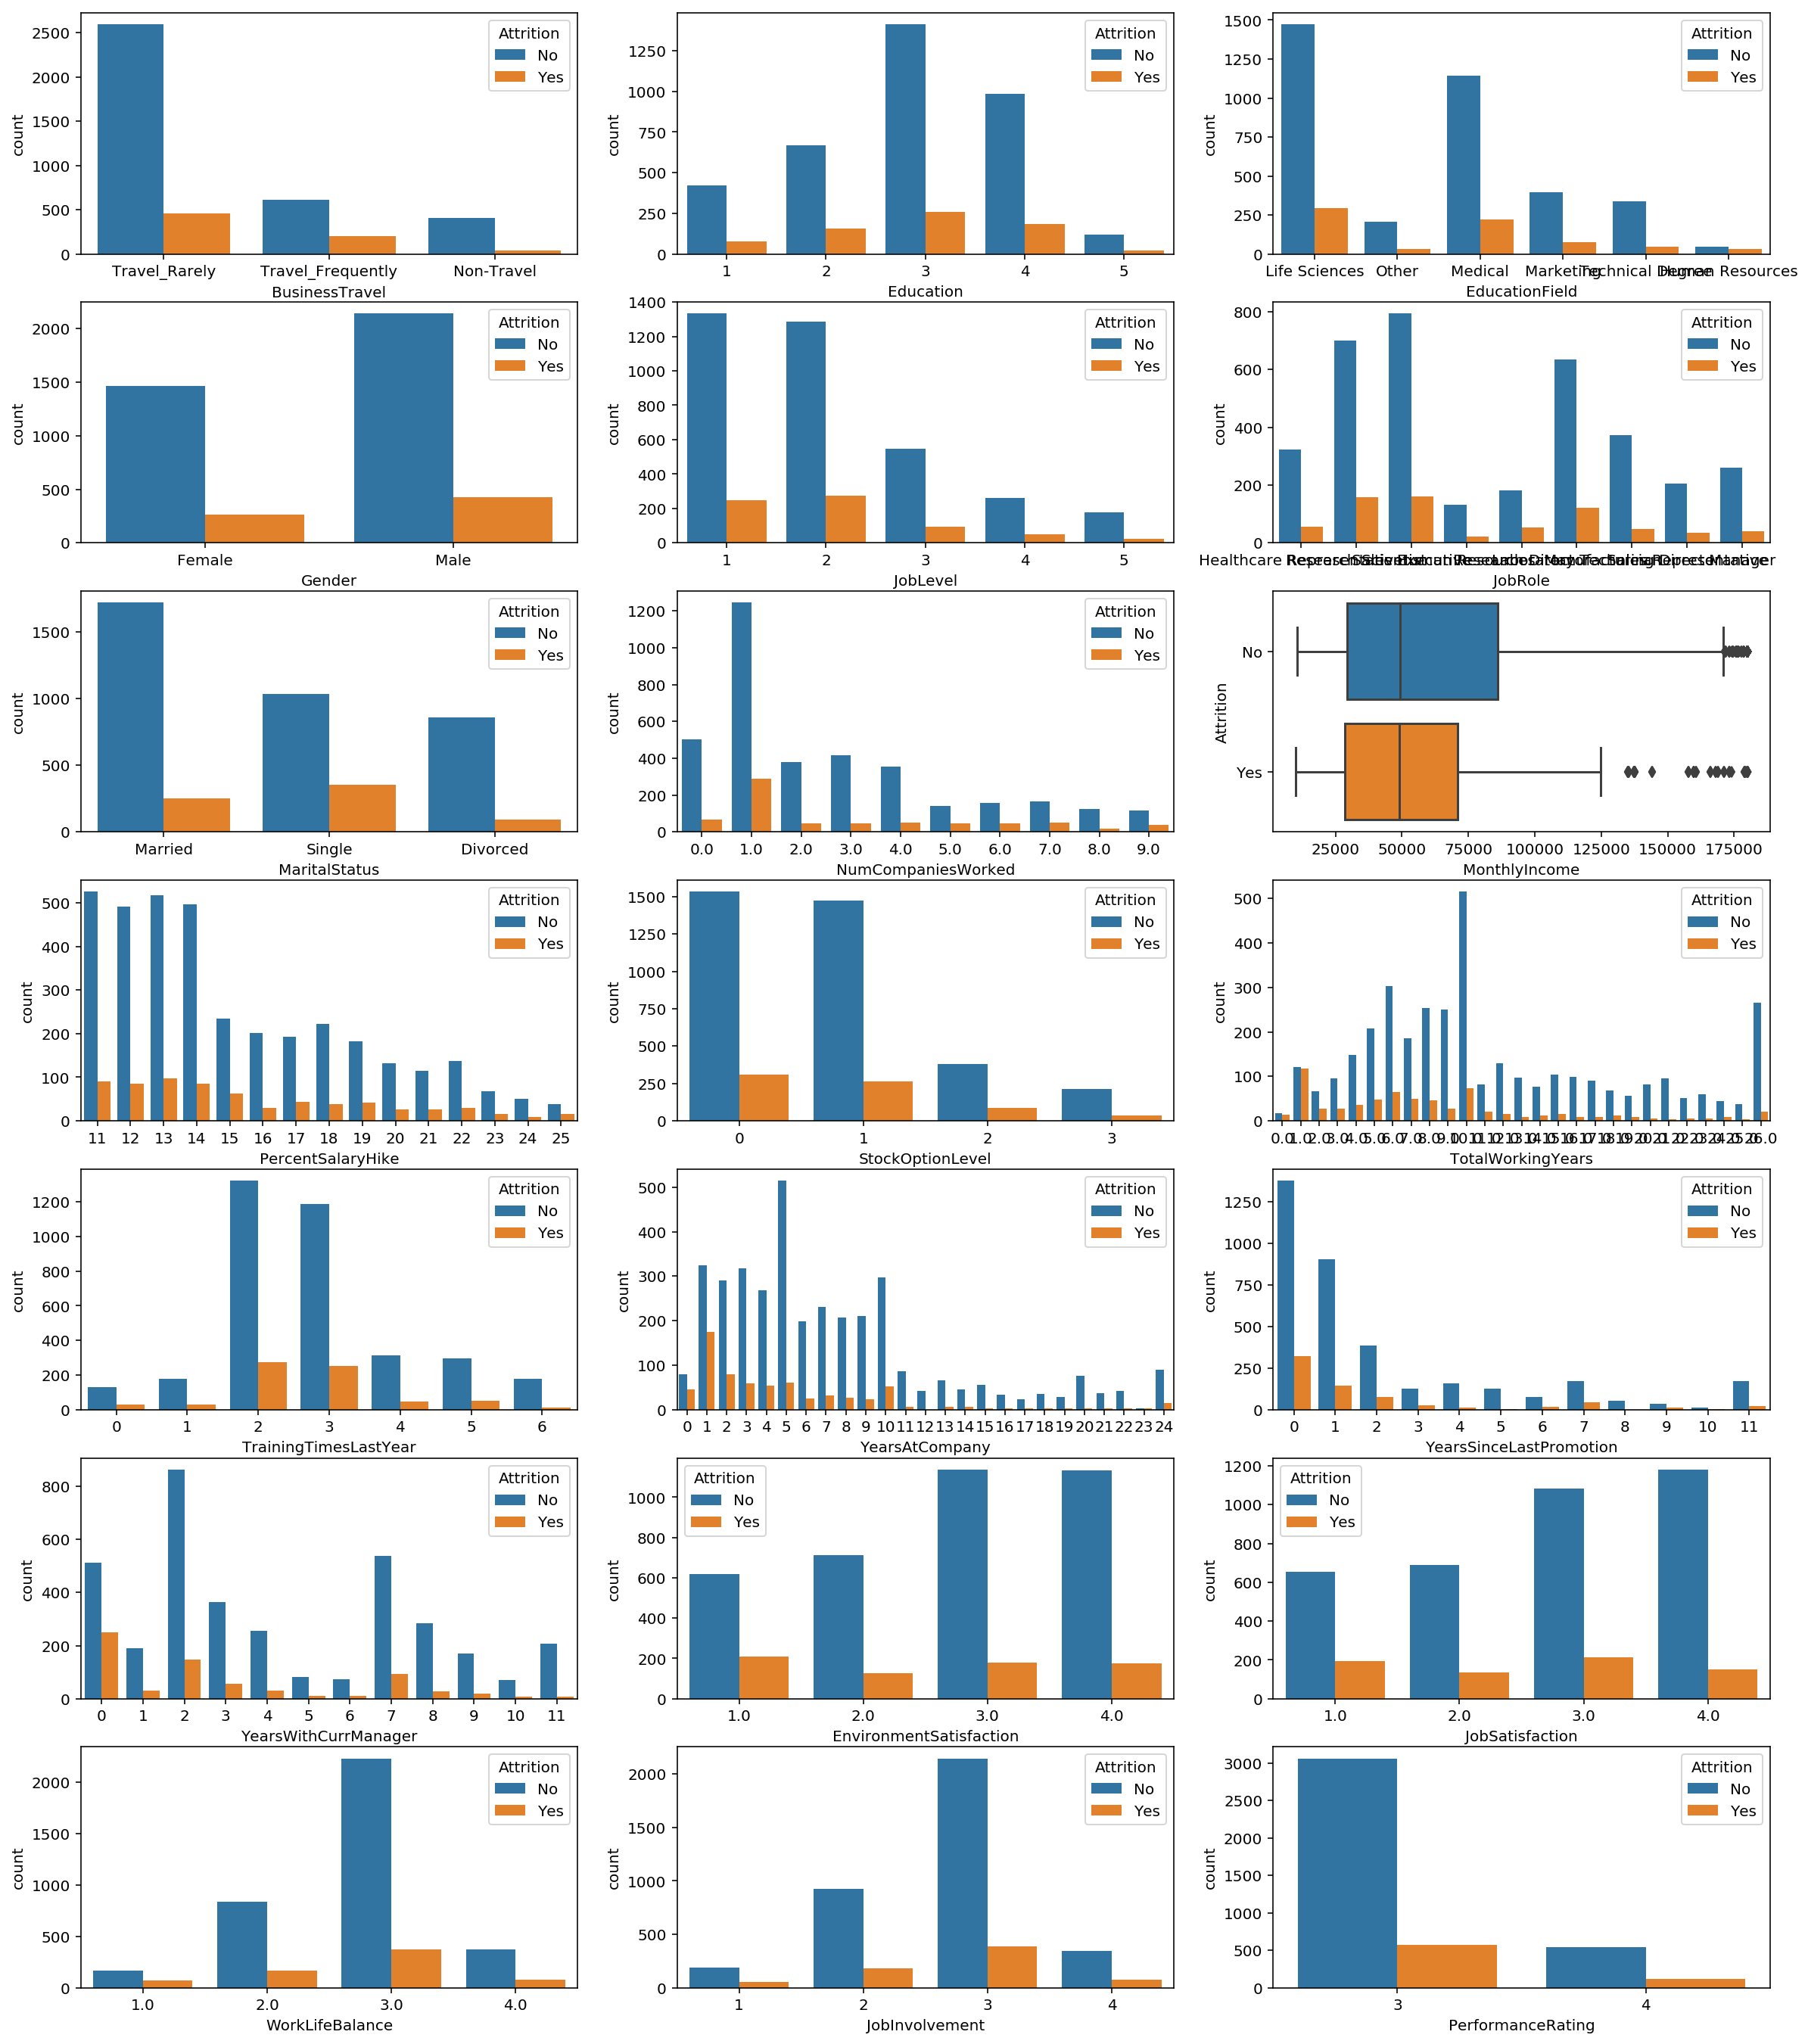

In [17]:
#Exploratory data analysis on merged data
x,y = 7,3
plt.figure(figsize=(20,24))
plt.subplot(x,y,1)
sns.countplot(x='BusinessTravel',hue='Attrition',data=df)
#Rare Travellers leave more however the percentage of frequent travellers are leaving more
plt.subplot(x,y,2)
sns.countplot(x='Education',hue='Attrition',data=df)
#Average Education leveled people leave more, the % attrition is similar in all
#so this should not have any relavance
plt.subplot(x,y,3)
sns.countplot(x='EducationField',hue='Attrition',data=df)
#Over 30% of human resources field leave
plt.subplot(x,y,4)
sns.countplot(x='Gender',hue='Attrition',data=df)
#No signicance
plt.subplot(x,y,5)
sns.countplot(x='JobLevel',hue='Attrition',data=df)
#No signicance
plt.subplot(x,y,6)
sns.countplot(x='JobRole',hue='Attrition',data=df)
#No signicance
plt.subplot(x,y,7)
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)
#Single people leave more
plt.subplot(x,y,8)
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=df)
#1 : leave a lot
plt.subplot(x,y,9)
sns.boxplot('MonthlyIncome','Attrition',data=df)
#The 3rd quitile show people who leave get lower salary
plt.subplot(x,y,10)
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=df)
#Looks like greater the hike the less people leave. #More data required
plt.subplot(x,y,11)
sns.countplot(x='StockOptionLevel',hue='Attrition',data=df)
#Nothing conclusive
plt.subplot(x,y,12)
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=df)
#close to 50% of the people with 0-1 working exp leave.
plt.subplot(x,y,13)
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df)
#0 - Leaves more, 6 - the least
plt.subplot(x,y,14)
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df)
#0-1years people leave the most
plt.subplot(x,y,15)
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df)
#Nothing conclusive
plt.subplot(x,y,16)
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df)
#Nothing conclusive
plt.subplot(x,y,17)
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=df)
#Lower env satisfied people leave more
plt.subplot(x,y,18)
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df)
#Lower job satisfied people leave more
plt.subplot(x,y,19)
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df)
#Lower work life balance people leave more
plt.subplot(x,y,20)
sns.countplot(x='JobInvolvement',hue='Attrition',data=df)
#Nothing conclusive
plt.subplot(x,y,21)
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)
#Looks like higher rated people leave more although percentage is almost same

In [18]:
#Data Preparation
pd.unique(df.Attrition) #No,Yes
df['Attrition']=df['Attrition'].map({'Yes' : 1, 'No' : 0})
df.Attrition.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [19]:
#Checking unique again
pd.unique(df.Over18) #Only Y
df.drop(['Over18'],axis=1,inplace=True)

In [20]:
#Converting strings to time
in_time.head()
for column in in_time.columns:
    in_time[column]=in_time[column].map(lambda x : pd.to_datetime(x))
    out_time[column]=out_time[column].map(lambda x : pd.to_datetime(x))
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](262)
memory usage: 8.8 MB


In [21]:
#Drop columns not needed 
#in_time.drop(['Unnamed: 0'],axis=1,inplace=True)
#out_time.drop(['Unnamed: 0'],axis=1,inplace=True)
#df.drop('EmployeeID', axis=1, inplace=True)

In [22]:
#Drop columns with all Na's
in_time.dropna(how='all',axis=1,inplace=True)
out_time.dropna(how='all',axis=1,inplace=True)

In [23]:
#Get average worktime for every employee
time = out_time-in_time
time = time.mean(axis=1)
time = round(time.dt.seconds/3600)
time = time.astype('int')
time = pd.DataFrame(time,columns=['Workhours'])
time['EmployeeID']=time.index.values+1
time

,Workhours,EmployeeID
0,7,1
1,8,2
2,7,3
3,7,4
4,8,5
5,11,6
6,7,7
7,7,8
8,7,9
9,7,10


In [24]:
#Merge datasets
final_df = pd.merge(df,time,how='inner',on='EmployeeID')
final_df.drop('EmployeeID',axis=1,inplace=True)
final_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Workhours
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3,7
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4,8
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,180000,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3,7
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3,7
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3,8


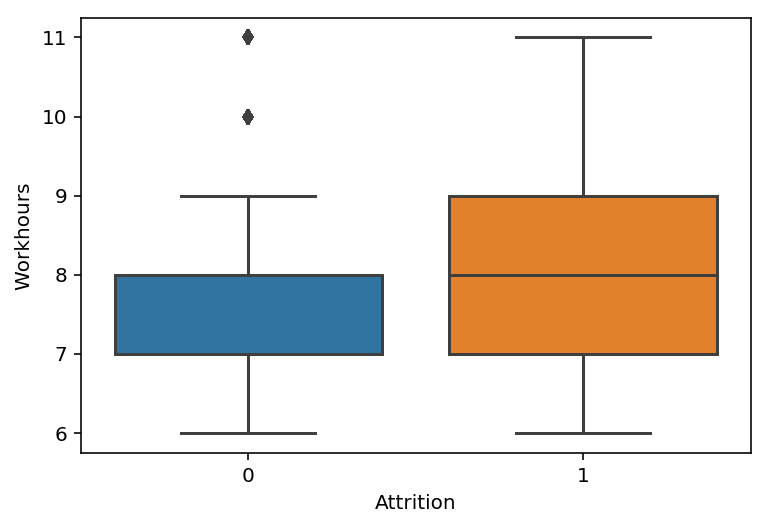

In [25]:
#one final EDA
sns.boxplot(y='Workhours',x='Attrition',data=final_df)
#People who left worked more

In [26]:
#Time to prepare the dataset for modelling
##### Dummies #####
#final_df.info()
final = pd.get_dummies(final_df,['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus'],drop_first=True)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4299
Data columns (total 40 columns):
Age                                  4300 non-null int64
Attrition                            4300 non-null int64
DistanceFromHome                     4300 non-null int64
Education                            4300 non-null int64
JobLevel                             4300 non-null int64
MonthlyIncome                        4300 non-null int64
NumCompaniesWorked                   4300 non-null float64
PercentSalaryHike                    4300 non-null int64
StockOptionLevel                     4300 non-null int64
TotalWorkingYears                    4300 non-null float64
TrainingTimesLastYear                4300 non-null int64
YearsAtCompany                       4300 non-null int64
YearsSinceLastPromotion              4300 non-null int64
YearsWithCurrManager                 4300 non-null int64
EnvironmentSatisfaction              4300 non-null float64
JobSatisfaction                 

In [27]:
#Train test split
from sklearn.model_selection import train_test_split
train,test = train_test_split(final, train_size=0.70, test_size=0.30,random_state=100)

In [28]:
#Creating X and Y for modelling
y_train = train['Attrition']
y_test = test['Attrition']
x_train = train.drop('Attrition', axis=1)
x_test = test.drop('Attrition', axis=1)

In [29]:
#Scale the train and test integers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ['Age','DistanceFromHome','Education','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating','Workhours']
x_train[col] = scaler.fit_transform(x_train[col])
x_test[col] = scaler.fit_transform(x_test[col])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [30]:
#Time for the actual machine learning
import statsmodels.api as sm
log_1 = sm.GLM(y_train,sm.add_constant(x_train),family=sm.families.Binomial())
log_1.fit().summary()

Generalized Linear Model Regression Results 
 
 Dep. Variable: Attrition No. Observations: 3010 
 
 
 Model: GLM Df Residuals: 2970 
 
 
 Model Family: Binomial Df Model: 39 
 
 
 Link Function: logit Scale: 1.0000 
 
 
 Method: IRLS Log-Likelihood: -1048.4 
 
 
 Date: Thu, 14 Mar 2019 Deviance: 2096.7 
 
 
 Time: 09:06:57 Pearson chi2: 5.12e+03 
 
 
 No. Iterations: 6 Covariance Type: nonrobust 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 const 0.6343 0.606 1.048 0.295 -0.552 1.821 
 
 
 Age -1.2883 0.366 -3.524 0.000 -2.005 -0.572 
 
 
 DistanceFromHome -0.0300 0.200 -0.150 0.881 -0.421 0.361 
 
 
 Education -0.3137 0.225 -1.392 0.164 -0.755 0.128 
 
 
 JobLevel -0.2644 0.203 -1.301 0.193 -0.663 0.134 
 
 
 MonthlyIncome -0.1721 0.219 -0.786 0.432 -0.601 0.257 
 
 
 NumCompaniesWorked 1.3632 0.221 6.167 0.000 0.930 1.796 
 
 
 PercentSalaryHike -0.1351 0.345 -0.391 0.696 -0.812 0.541 
 
 
 StockOptionLevel -0.1097 0.199 -0.551 0.581 -0.500 0.280 
 
 
 TotalWorkingYears -2.3580 0.439 -5.377 0.000 -3.218 -1.499 
 
 
 TrainingTimesLastYear -0.8604 0.268 -3.212 0.001 -1.385 -0.335 
 
 
 YearsAtCompany 0.7430 0.625 1.189 0.235 -0.482 1.968 
 
 
 YearsSinceLastPromotion 1.4103 0.312 4.524 0.000 0.799 2.021 
 
 
 YearsWithCurrManager -1.7217 0.363 -4.747 0.000 -2.433 -1.011 
 
 
 EnvironmentSatisfaction -1.0454 0.154 -6.800 0.000 -1.347 -0.744 
 
 
 JobSatisfaction -1.0969 0.154 -7.114 0.000 -1.399 -0.795 
 
 
 WorkLifeBalance -0.9520 0.232 -4.097 0.000 -1.407 -0.497 
 
 
 JobInvolvement -0.4627 0.229 -2.020 0.043 -0.912 -0.014 
 
 
 PerformanceRating 0.2034 0.245 0.830 0.407 -0.277 0.684 
 
 
 Workhours 2.0831 0.201 10.348 0.000 1.689 2.478 
 
 
 BusinessTravel_Travel_Frequently 1.6412 0.272 6.035 0.000 1.108 2.174 
 
 
 BusinessTravel_Travel_Rarely 0.8359 0.257 3.255 0.001 0.333 1.339 
 
 
 Department_Research & Development -0.7286 0.311 -2.346 0.019 -1.337 -0.120 
 
 
 Department_Sales -0.7529 0.327 -2.302 0.021 -1.394 -0.112 
 
 
 EducationField_Life Sciences -0.1925 0.463 -0.416 0.677 -1.100 0.715 
 
 
 EducationField_Marketing -0.4638 0.505 -0.918 0.358 -1.454 0.526 
 
 
 EducationField_Medical -0.3416 0.462 -0.739 0.460 -1.247 0.564 
 
 
 EducationField_Other -0.7615 0.524 -1.452 0.146 -1.789 0.266 
 
 
 EducationField_Technical Degree -0.3090 0.493 -0.627 0.531 -1.276 0.657 
 
 
 Gender_Male 0.0603 0.117 0.515 0.607 -0.169 0.290 
 
 
 JobRole_Human Resources -0.1015 0.390 -0.261 0.794 -0.865 0.662 
 
 
 JobRole_Laboratory Technician 0.2047 0.242 0.845 0.398 -0.270 0.680 
 
 
 JobRole_Manager -0.3396 0.313 -1.084 0.278 -0.954 0.275 
 
 
 JobRole_Manufacturing Director -0.2578 0.281 -0.918 0.358 -0.808 0.292 
 
 
 JobRole_Research Director 0.7461 0.288 2.593 0.010 0.182 1.310 
 
 
 JobRole_Research Scientist 0.1610 0.236 0.683 0.495 -0.301 0.623 
 
 
 JobRole_Sales Executive 0.3665 0.232 1.577 0.115 -0.089 0.822 
 
 
 JobRole_Sales Representative 0.1686 0.303 0.556 0.578 -0.426 0.763 
 
 
 MaritalStatus_Married 0.2590 0.169 1.534 0.125 -0.072 0.590 
 
 
 MaritalStatus_Single 1.1408 0.168 6.771 0.000 0.811 1.471

In [31]:
#RFE Feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')
log = LogisticRegression()
rfe = RFE(log,10)
rfe.fit(x_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False  True False False  True False False  True
  True  True  True False False False  True  True False False False False
 False False False False False False False False False False False False
 False False  True]
[ 1 30 12 13 18  1 25 27  1  6 14  1  1  1  1  4 11 23  1  1  5  3  2 29
 17 22 10 24 28 26 19  7  8  9 21 16 20 15  1]


In [32]:
#Filter columns
columns = x_train.columns[rfe.support_]
x_train = x_train[columns]
x_train.head()

,Age,NumCompaniesWorked,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,Workhours,BusinessTravel_Travel_Frequently,MaritalStatus_Single
2972,0.214286,0.111111,0.192308,0.000000,0.363636,1.000000,0.333333,0.0,0,0
1223,0.714286,1.000000,0.884615,0.000000,0.000000,0.000000,0.666667,0.6,0,1
1625,0.190476,0.111111,0.038462,0.000000,0.000000,0.666667,1.000000,0.6,0,1
2339,0.357143,0.111111,0.269231,0.090909,0.181818,0.666667,1.000000,0.6,0,0
4295,0.261905,0.111111,0.230769,0.090909,0.454545,0.666667,1.000000,0.2,0,1


In [33]:
#New model with filtered data
log_2 = sm.GLM(y_train,sm.add_constant(x_train),family=sm.families.Binomial())
log_2.fit().summary()

Generalized Linear Model Regression Results 
 
 Dep. Variable: Attrition No. Observations: 3010 
 
 
 Model: GLM Df Residuals: 2999 
 
 
 Model Family: Binomial Df Model: 10 
 
 
 Link Function: logit Scale: 1.0000 
 
 
 Method: IRLS Log-Likelihood: -1095.0 
 
 
 Date: Thu, 14 Mar 2019 Deviance: 2190.0 
 
 
 Time: 09:07:03 Pearson chi2: 4.90e+03 
 
 
 No. Iterations: 6 Covariance Type: nonrobust 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 const -0.8127 0.191 -4.253 0.000 -1.187 -0.438 
 
 
 Age -1.1581 0.349 -3.323 0.001 -1.841 -0.475 
 
 
 NumCompaniesWorked 1.1403 0.206 5.524 0.000 0.736 1.545 
 
 
 TotalWorkingYears -1.9433 0.369 -5.260 0.000 -2.667 -1.219 
 
 
 YearsSinceLastPromotion 1.2788 0.280 4.573 0.000 0.731 1.827 
 
 
 YearsWithCurrManager -1.4458 0.272 -5.311 0.000 -1.979 -0.912 
 
 
 EnvironmentSatisfaction -1.0078 0.149 -6.747 0.000 -1.301 -0.715 
 
 
 JobSatisfaction -1.0341 0.149 -6.959 0.000 -1.325 -0.743 
 
 
 Workhours 2.1304 0.195 10.933 0.000 1.748 2.512 
 
 
 BusinessTravel_Travel_Frequently 0.7995 0.126 6.343 0.000 0.552 1.047 
 
 
 MaritalStatus_Single 0.9705 0.111 8.713 0.000 0.752 1.189

In [34]:
#Need to check VIF : Function creation
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_func(x_train):
    vif = pd.DataFrame()
    vif['Features'] = x_train.columns
    vif['vif'] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
    return vif.sort_values(by='vif',ascending=False)

In [35]:
#Check VIF
vif = vif_func(x_train)
#vif #Age has high VIF
features = x_train.columns
features = features.drop('Age') #Dropped AGE

In [36]:
#RERun the model
log_3 = sm.GLM(y_train,sm.add_constant(x_train[features]),family=sm.families.Binomial())
log_3.fit().summary()

Generalized Linear Model Regression Results 
 
 Dep. Variable: Attrition No. Observations: 3010 
 
 
 Model: GLM Df Residuals: 3000 
 
 
 Model Family: Binomial Df Model: 9 
 
 
 Link Function: logit Scale: 1.0000 
 
 
 Method: IRLS Log-Likelihood: -1100.7 
 
 
 Date: Thu, 14 Mar 2019 Deviance: 2201.5 
 
 
 Time: 09:07:08 Pearson chi2: 4.69e+03 
 
 
 No. Iterations: 6 Covariance Type: nonrobust 
 
 
 
 
 coef std err z P>|z| [0.025 0.975] 
 
 
 const -1.0506 0.178 -5.904 0.000 -1.399 -0.702 
 
 
 NumCompaniesWorked 1.0204 0.203 5.023 0.000 0.622 1.419 
 
 
 TotalWorkingYears -2.5952 0.315 -8.249 0.000 -3.212 -1.979 
 
 
 YearsSinceLastPromotion 1.2614 0.281 4.495 0.000 0.711 1.811 
 
 
 YearsWithCurrManager -1.3513 0.272 -4.971 0.000 -1.884 -0.819 
 
 
 EnvironmentSatisfaction -0.9954 0.149 -6.701 0.000 -1.287 -0.704 
 
 
 JobSatisfaction -1.0382 0.148 -7.001 0.000 -1.329 -0.748 
 
 
 Workhours 2.1042 0.194 10.852 0.000 1.724 2.484 
 
 
 BusinessTravel_Travel_Frequently 0.7923 0.125 6.314 0.000 0.546 1.038 
 
 
 MaritalStatus_Single 1.0027 0.111 9.058 0.000 0.786 1.220

In [37]:
#Check VIF
vif = vif_func(x_train[features])
vif #TotalWorkingYears has high VIF
features = features.drop('TotalWorkingYears') #Dropped

In [38]:
#RERun the model
log_4 = sm.GLM(y_train,sm.add_constant(x_train[features]),family=sm.families.Binomial())
print(log_4.fit().summary())
#NumCompaniesWorked has high P value
features = features.drop('NumCompaniesWorked') #Dropped

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3001
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1142.2
Date:                Thu, 14 Mar 2019   Deviance:                       2284.5
Time:                        09:07:11   Pearson chi2:                 3.45e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.4562      0.171     -8.500      0.000      -1.79

In [39]:
#RERun the model
log_5 = sm.GLM(y_train,sm.add_constant(x_train[features]),family=sm.families.Binomial())
print(log_5.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     3002
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1143.3
Date:                Thu, 14 Mar 2019   Deviance:                       2286.7
Time:                        09:07:13   Pearson chi2:                 3.45e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.3486      0.155     -8.698      0.000      -1.65

In [40]:
#Check VIF
vif = vif_func(x_train[features])
vif #VIF OK

,Features,vif
1,YearsWithCurrManager,2.978221
2,EnvironmentSatisfaction,2.622274
3,JobSatisfaction,2.517975
4,Workhours,2.118721
0,YearsSinceLastPromotion,2.050194
6,MaritalStatus_Single,1.420371
5,BusinessTravel_Travel_Frequently,1.231076


In [170]:
#Need to test the model now
final_model = log.fit(x_train[features],y_train)
y_pred = final_model.predict_proba(x_test[features])
y_pred_df = pd.DataFrame(y_pred)
y_pred_df = y_pred_df.iloc[:,[1]]
y_test_df = pd.DataFrame(y_test)
#_test_df.head()
cutoff = 0.5
y_test_df['index'] = y_test_df.index
y_pred_df['index'] = y_pred_df.index
y_df = pd.merge(y_pred_df,y_test_df,how='inner',on='index')
y_df.columns = ['Predict','index','Actual']
y_df.drop('index',axis=1,inplace=True)
matrix = y_df.copy()
matrix['Predict'] = y_df['Predict'].map(lambda x : 1 if x>cutoff else 0 )
matrix.head()

,Predict,Actual
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [171]:
#Time for confusion
from sklearn import metrics
confusion = metrics.confusion_matrix(matrix.Actual,matrix.Predict)
print(confusion)
#     Predicted   1       0
# Actual
# 1             315      17
# 0              55       3  


[[315  17]
 [ 55   3]]


In [155]:
acc = metrics.accuracy_score(matrix.Actual,matrix.Predict)
TP = confusion[0,0] #true postive
TN = confusion[1,1] #true negative
FP = confusion[1,0] #false positive
FN = confusion[0,1] #false negative
sen = TP/(TP+FN)
spe = TN/(TN+FP)
spe

0.3620689655172414

In [159]:
#Make a function to decide cutoff

def get_data(cut):
    matrix = y_df.copy()
    matrix['Predict'] = y_df['Predict'].map(lambda x : 1 if x>cut else 0 )
    confusion = metrics.confusion_matrix(matrix.Actual,matrix.Predict)
    acc = metrics.accuracy_score(matrix.Actual,matrix.Predict)
    TP = confusion[0,0] #true postive
    TN = confusion[1,1] #true negative
    FP = confusion[1,0] #false positive
    FN = confusion[0,1] #false negative
    sen = TP/(TP+FN)
    spe = TN/(TN+FP)
    return acc,sen,spe
    
cut = np.arange(0,1,0.01)
accuracy = list()
sensitivity = list()
specificity = list()

#plot_df = pd.DataFrame(x)
for x in cut:
    acc,sen,spe = get_data(x)
    accuracy.append(acc)
    sensitivity.append(sen)
    specificity.append(spe)

In [160]:
plot_df = pd.DataFrame(columns=['Cut','Acc','Sen','Spe'])
plot_df.Cut = cut
plot_df.Acc = accuracy
plot_df.Sen = sensitivity
plot_df.Spe = specificity
plot_df.loc[plot_df.Spe.isna(),'Spe'] = 0
plot_df.index = plot_df.Cut
plot_df.drop('Cut',axis=1,inplace=True)
plot_df

,Acc,Sen,Spe
Cut,,,
0.00,0.148718,0.000000,1.000000
0.01,0.148718,0.000000,1.000000
0.02,0.166667,0.027108,0.965517
0.03,0.192308,0.072289,0.879310
0.04,0.235897,0.129518,0.844828
0.05,0.266667,0.177711,0.775862
0.06,0.307692,0.237952,0.706897
0.07,0.356410,0.298193,0.689655
0.08,0.394872,0.343373,0.689655


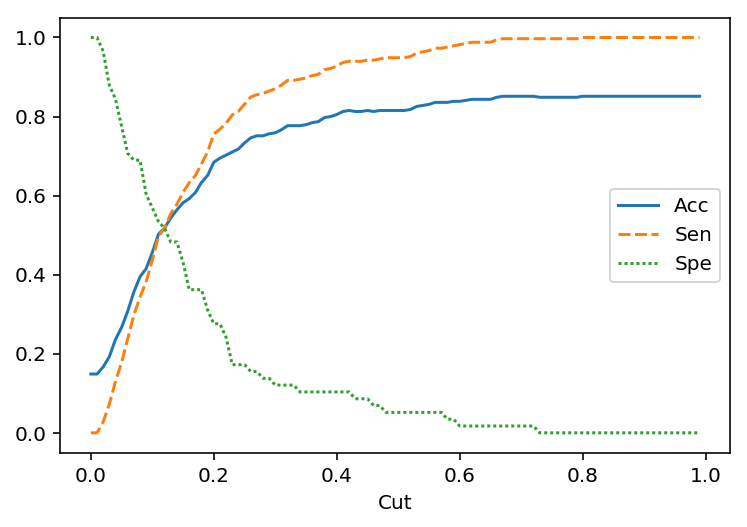

In [161]:
sns.lineplot(data=plot_df)
#0.8 looks good